In [1]:
import torch
from torch import nn
from torchvision import datasets, transforms
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,),(0.3081,)),  # mean value = 0.1307, standard deviation value = 0.3081
])


In [3]:
data_path = './MNIST'

training_set = datasets.MNIST(root = data_path, train= True, download=True, transform= transform)
testing_set = datasets.MNIST(root = data_path, train= False, download=True, transform= transform)


In [4]:
training_set[0][0]
training_set[0][1]
# training_set is composed of image and label

5

In [5]:
type(training_set[0][0])
#already tensor, no need to convert

torch.Tensor

In [6]:
class classification(nn.Module):
    def __init__(self):
        super(classification, self).__init__()
        
        # construct layers for a neural network
        self.classifier1 = nn.Sequential(
            nn.Linear(in_features=28*28, out_features=20*20),
            nn.Sigmoid(),
        ) 
        self.classifier2 = nn.Sequential(
            nn.Linear(in_features=20*20, out_features=10*10),
            nn.Sigmoid(),
        ) 
        self.classifier3 = nn.Sequential(
            nn.Linear(in_features=10*10, out_features=10),
            nn.LogSoftmax(dim=1),
        ) 
        
        
    def forward(self, inputs):                 # [batchSize, 1, 28, 28]
        x = inputs.view(inputs.size(0), -1)    # [batchSize, 28*28]
        x = self.classifier1(x)                # [batchSize, 20*20]
        x = self.classifier2(x)                # [batchSize, 10*10]
        out = self.classifier3(x)              # [batchSize, 10]
        
        return out


In [7]:
criterion = nn.NLLLoss()

In [8]:
device="cuda"
learning_rate_value=0.01

In [10]:
classifier = classification().to(device)
optimizer = torch.optim.SGD(classifier.parameters(), lr=learning_rate_value)


In [26]:
#start training with batchsize 32
classifier = classification().to("cuda")
optimizer = torch.optim.SGD(classifier.parameters(), lr=learning_rate_value)
criterion = nn.NLLLoss()
batch_size=32
epoch = 30
loss_train_arr=np.zeros(epoch)
accuracy_train_arr=np.zeros(epoch)
loss_test_arr=np.zeros(epoch)
accuracy_test_arr=np.zeros(epoch)

batched_train = torch.utils.data.DataLoader(training_set, 32, shuffle=True)
batched_test = torch.utils.data.DataLoader(testing_set, 32, shuffle=True)

for i in range(epoch):
    
    #test, no need to backward, step
    loss_test=0
    accuracy_test=0
    
    for img, label in batched_test:
        img=img.to(device)
        label=label.to(device)
        
        predicted = classifier(img)
        label_predicted = torch.argmax(predicted,dim=1)
        loss = criterion(predicted, label)
        
        loss_test += loss.item()
        accuracy_test += torch.sum(label_predicted==label)
        
    loss_test_arr[i]=loss_test/(len(batched_test))
    accuracy_test_arr[i]=accuracy_test/len(batched_test.dataset)
    
    
    loss_train=0
    accuracy_train=0
    
    #train and compute loss, accuracy
    for img, label in batched_train:
        img=img.to(device)
        label=label.to(device)
        optimizer.zero_grad()
        predicted = classifier(img)

        label_predicted = torch.argmax(predicted,dim=1)
        loss = criterion(predicted, label)
        loss.backward()
        optimizer.step()
        
        loss_train += loss.item()
        accuracy_train += torch.sum(label_predicted==label)
        

    loss_train_arr[i]=loss_train/(len(batched_train)) #number of batch
    accuracy_train_arr[i]=accuracy_train/len(batched_train.dataset)
    

    
    
    
    if i%5==0:
        print("train loss", loss_train_arr[i])
        print("train accuracy: ",accuracy_train_arr[i])
        print("test loss", loss_test_arr[i])
        print("test accuracy", accuracy_test_arr[i])
    
    

train loss 2.162510122426351
train accuracy:  0.33133333921432495
test loss 2.328827745236528
test accuracy 0.0957999974489212
train loss 0.3922239746928215
train accuracy:  0.8904666900634766
test loss 0.39759937780924115
test accuracy 0.8880999684333801
train loss 0.28710817177295683
train accuracy:  0.9175666570663452
test loss 0.2853447726121345
test accuracy 0.9181999564170837
train loss 0.23485755263765654
train accuracy:  0.9319833517074585
test loss 0.23567627074000552
test accuracy 0.9317999482154846
train loss 0.19565650023519993
train accuracy:  0.9444000124931335
test loss 0.19924304360589282
test accuracy 0.9417999982833862
train loss 0.16495847398390373
train accuracy:  0.9535666704177856
test loss 0.17068756078355038
test accuracy 0.9493999481201172


In [41]:
import time
def startTraining(batch_size,epoch,learning_rate_value):
    #start training with batchsize 32
    start_time = time.time()
    print("start training for batch size ",batch_size)
    
    classifier = classification().to("cuda")
    optimizer = torch.optim.SGD(classifier.parameters(), lr=learning_rate_value)
    criterion = nn.NLLLoss()
    
    #define array to save values
    
    loss_train_arr=np.zeros(epoch)
    accuracy_train_arr=np.zeros(epoch)
    loss_test_arr=np.zeros(epoch)
    accuracy_test_arr=np.zeros(epoch)

    batched_train = torch.utils.data.DataLoader(training_set, batch_size, shuffle=True)
    batched_test = torch.utils.data.DataLoader(testing_set, batch_size, shuffle=True)

    for i in range(epoch):
        
        loss_train=0
        accuracy_train=0
        loss_test=0
        accuracy_test=0
        
        #test, no need to backward, step
        for img, label in batched_test:
            img=img.to(device)
            label=label.to(device)

            predicted = classifier(img)
            label_predicted = torch.argmax(predicted,dim=1)
            loss = criterion(predicted, label)

            loss_test += loss.item()
            accuracy_test += torch.sum(label_predicted==label)

        loss_test_arr[i]=loss_test/(len(batched_test))
        accuracy_test_arr[i]=accuracy_test/len(batched_test.dataset)
        
        #train and compute loss, accuracy
        for img, label in batched_train:
            img=img.to(device)
            label=label.to(device)
            optimizer.zero_grad()
            predicted = classifier(img)

            label_predicted = torch.argmax(predicted,dim=1)
            loss = criterion(predicted, label)
            loss.backward()
            optimizer.step()

            loss_train += loss.item()
            accuracy_train += torch.sum(label_predicted==label)


        loss_train_arr[i]=loss_train/(len(batched_train)) 
        accuracy_train_arr[i]=accuracy_train/len(batched_train.dataset)



        

        if i%5==0:
            print("train loss", loss_train_arr[i])
            print("train accuracy: ",accuracy_train_arr[i])
            print("test loss", loss_test_arr[i])
            print("test accuracy", accuracy_test_arr[i])
    print("execution time =======", time.time()-start_time)
    
    return loss_train_arr, loss_test_arr, accuracy_train_arr, accuracy_test_arr


In [42]:
len(batched_test)

313

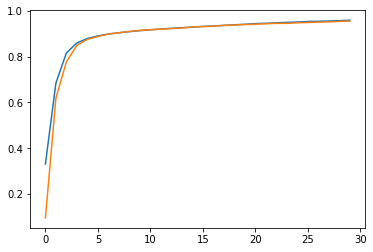

In [28]:
plt.plot(accuracy_train_arr)
plt.plot(accuracy_test_arr)


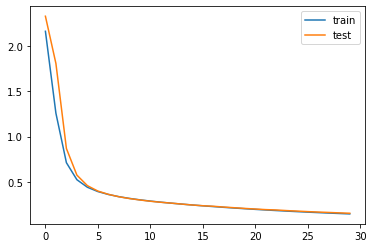

In [31]:
plt.plot(loss_train_arr,label="train")
plt.plot(loss_test_arr,label="test")
plt.legend()

0.14536274313529332

In [43]:
loss_train_32,loss_test_32,acc_train_32,acc_test_32 = startTraining(32,60,0.01)
loss_train_64,loss_test_64,acc_train_64,acc_test_64 = startTraining(64,60,0.01)
loss_train_128,loss_test_128,acc_train_128,acc_test_128 = startTraining(128,60,0.01)

start training for batch size  32
train loss 2.1778733839670816
train accuracy:  0.3093833327293396
test loss 2.3686002237728228
test accuracy 0.10279999673366547
train loss 0.3967834216515223
train accuracy:  0.8909167051315308
test loss 0.4063619066731998
test accuracy 0.8894000053405762
train loss 0.29037976877888044
train accuracy:  0.9172666668891907
test loss 0.28765475959442677
test accuracy 0.91839998960495
train loss 0.2374424964706103
train accuracy:  0.9314333200454712
test loss 0.23902242648572966
test accuracy 0.9303999543190002
train loss 0.19752160049974918
train accuracy:  0.9434166550636292
test loss 0.20126385126893703
test accuracy 0.9432999491691589
train loss 0.16648251870274544
train accuracy:  0.9529833197593689
test loss 0.17197511536173357
test accuracy 0.9513999819755554
train loss 0.142207479181389
train accuracy:  0.9598667025566101
test loss 0.15041821867751237
test accuracy 0.9564999938011169
train loss 0.12322196636001269
train accuracy:  0.96546667814254

[]

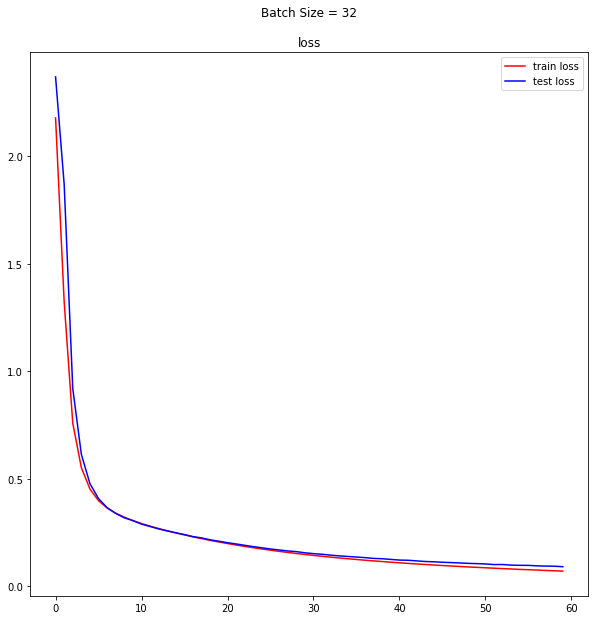

In [50]:
plt.figure(1,figsize=(10,10))

plt.plot(loss_train_32,label="train loss",c="red")
plt.plot(loss_test_32,label="test loss",c="blue")
plt.title("Batch Size = 32\n\nloss")
plt.legend()
plt.plot()

# Outputs

# 1. Plot the training and testing losses with a batch size of 32 [4pt]

[]

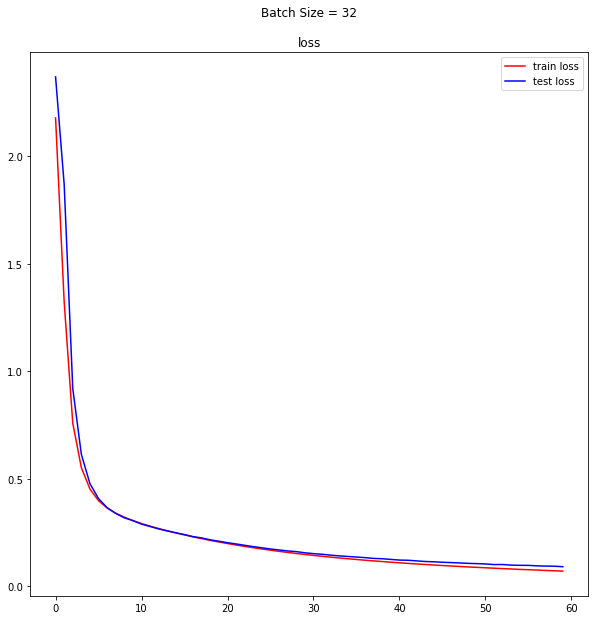

In [51]:
plt.figure(1,figsize=(10,10))

plt.plot(loss_train_32,label="train loss",c="red")
plt.plot(loss_test_32,label="test loss",c="blue")
plt.title("Batch Size = 32\n\nloss")
plt.legend()
plt.plot()

# 2. Plot the training and testing accuracies with a batch size of 32 [4pt]

# 3. Plot the training and testing losses with a batch size of 64 [4pt]

[]

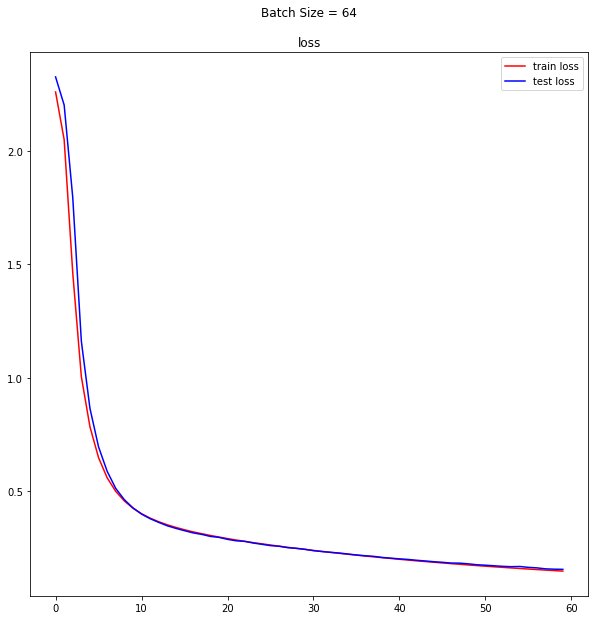

In [53]:
plt.figure(1,figsize=(10,10))

plt.plot(loss_train_64,label="train loss",c="red")
plt.plot(loss_test_64,label="test loss",c="blue")
plt.title("Batch Size = 64\n\nloss")
plt.legend()
plt.plot()

# 4. Plot the training and testing accuracies with a batch size of 64 [4pt]

# 5. Plot the training and testing losses with a batch size of 128 [4pt]

[]

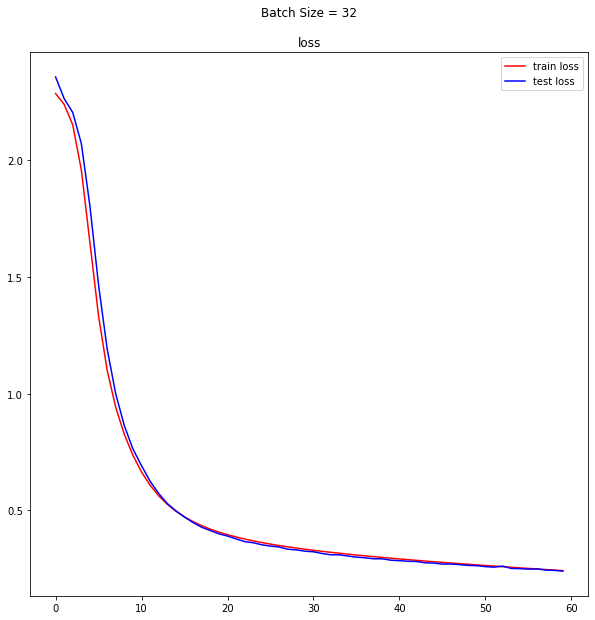

In [52]:
plt.figure(1,figsize=(10,10))

plt.plot(loss_train_128,label="train loss",c="red")
plt.plot(loss_test_128,label="test loss",c="blue")
plt.title("Batch Size = 32\n\nloss")
plt.legend()
plt.plot()

# 6. Plot the training and testing accuracies with a batch size of 128 [4pt]


# 7. Print the loss at convergence with different mini-batch sizes [3pt]

# 8. Print the accuracy at convergence with different mini-batch sizes [3pt]